In [1]:
import numpy as np
from PySDM.physics.constants import si
from PySDM_examples.Luettmer_homogeneous_freezing.commons import run_simulations, hom_pure_droplet_freezing_backend, hom_pure_droplet_freezing_standard_setup
from PySDM_examples.Luettmer_homogeneous_freezing.simulation import Simulation
from PySDM_examples.Luettmer_homogeneous_freezing.settings import Settings
from PySDM_examples.Luettmer_homogeneous_freezing import plot
from importlib import reload
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot

In [2]:
""" General settings """
hom_freezing_types     = [  "KoopMurray2016", "Spichtinger2023" ]
vertical_updrafts = np.geomspace(0.2,10,num=9) * si.meter / si.second

backends = hom_pure_droplet_freezing_backend()
standard = hom_pure_droplet_freezing_standard_setup()

In [3]:
setting_dict = {
            **standard,
            "backend": backends["KoopMurray2016"],
            "hom_freezing": "KoopMurray2016",
            "w_updraft": 1.,
            "deposition_enable": False,
            "coalescence_enable": True,
            "n_output": 1,
            "dz": 0.2 * si.meter,
            "n_sd": 10,
            }
test = Settings(**setting_dict)

Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10 and n_dv=749999999.9999999


In [4]:
""" High output step reference simulations """
setting_dict = {
            **standard,
            "backend": backends["KoopMurray2016"],
            "hom_freezing": "KoopMurray2016",
            "w_updraft": 1.,
            "deposition_enable": False,
            "coalescence_enable": True,
            "n_output": 1,
            "dz": 0.2 * si.meter,
            }
KoopMurray2016_reference_high_w_simulation_no_coal = run_simulations(setting_dict)

setting_dict["coalescence_enable"] = True
KoopMurray2016_reference_high_w_simulation_coal = run_simulations(setting_dict)

setting_dict["deposition_enable"] = True
KoopMurray2016_reference_high_w_simulation_coal_and_dep = run_simulations(setting_dict)

Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=1000 and n_dv=749999999.9999999
Starting simulation...
all particles frozen or evaporated


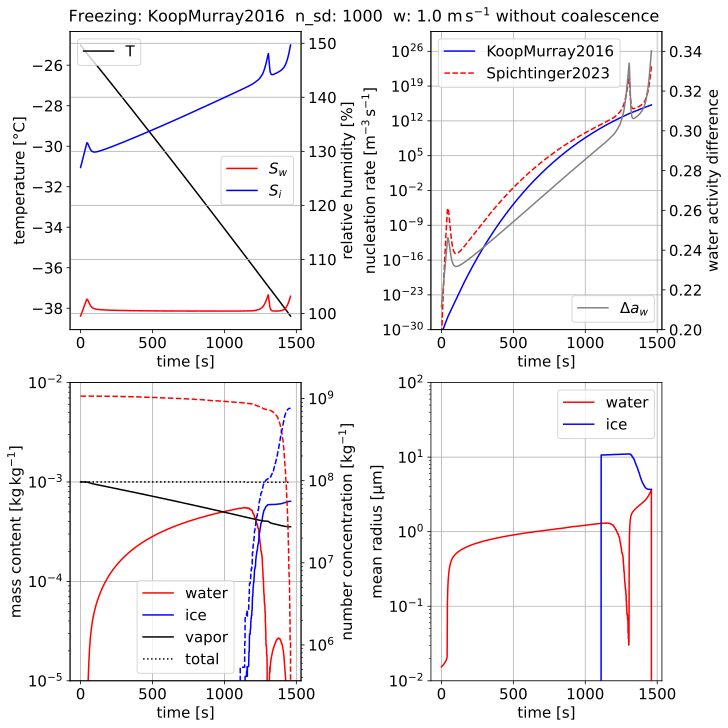

In [5]:
plot.plot_thermodynamics_and_bulk(KoopMurray2016_reference_high_w_simulation_no_coal, " without coalescence", show_conc = True)
show_plot("fig_KM16_low_w_no_coal")
plot.plot_thermodynamics_and_bulk(KoopMurray2016_reference_high_w_simulation_coal, " with coalescence", show_conc = True)
show_plot("fig_KM16_low_w_coal")
plot.plot_thermodynamics_and_bulk(KoopMurray2016_reference_high_w_simulation_coal_and_dep, " with coalescence & deposition", show_conc = True)
show_plot("fig_KM16_low_w_coal_dep")

In [5]:
""" Simulations for n_sd ensemble with coalescence """
nsd_ensemble_simulations =[]
number_of_nsd = (1e1, 1e2, 1e3)
for hom_freezing_type in hom_freezing_types:
    for n_sd in number_of_nsd:
        setting_dict = {
            **standard,
            "n_sd": int(n_sd),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "number_of_ensemble_runs": 5,
            "deposition_enable": False,
            "coalescence_enable": True,
            }
        nsd_ensemble_simulations.append( run_simulations(setting_dict) )

Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=100 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10

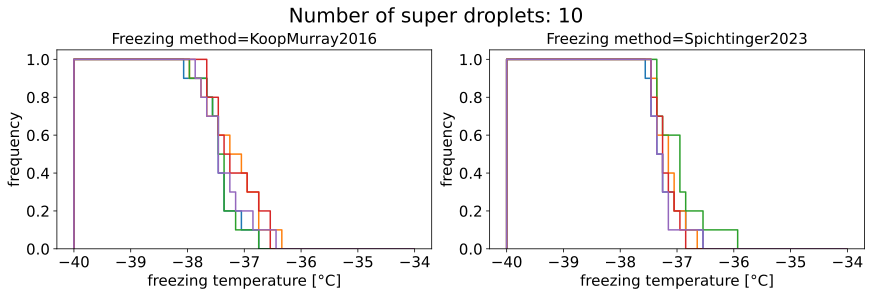

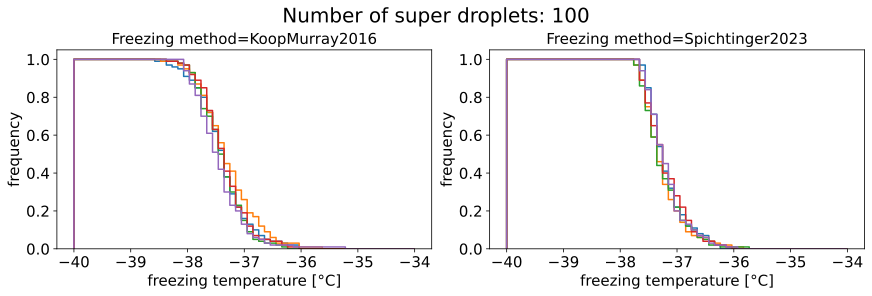

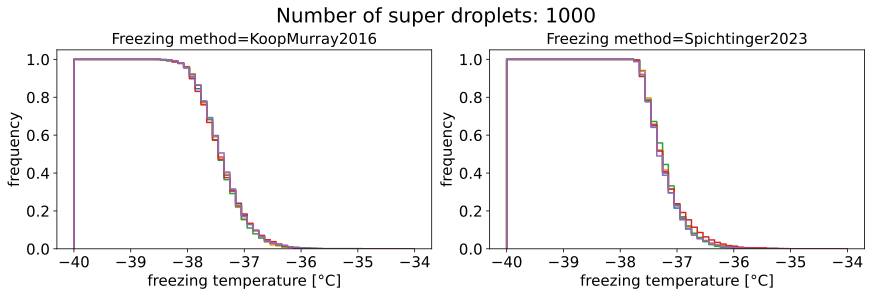

In [6]:
""" Plots for n_sd ensemble with coalescence """
for n_sd in number_of_nsd:
    fig, axs = pyplot.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
    fig.suptitle("Number of super droplets: {}".format(int(n_sd)),fontsize=20)
    axs = axs.ravel()
    i = 0
    for simulation in nsd_ensemble_simulations:
        if simulation["settings"]["n_sd"] == n_sd and simulation["settings"]["w_updraft"] == standard["w_updraft"]:
            axs[i] = plot.plot_freezing_temperatures_histogram(axs[i], simulation)
            i += 1
    show_plot("n_sd_"+str(n_sd)+"_ensemble_coalescence")